<a href="https://colab.research.google.com/github/Quinn-Caton/UMKC_DataScience/blob/main/Caton_Participation4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Lab

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from google.colab import drive
drive.mount('/content/drive') # mount personal G-Drive

# /content/drive/MyDrive/UMKC_Fa24/datasets/[filename] <- to import dataset from Google Drive

Mounted at /content/drive


In [2]:
# load dataset
df_crab = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/crab-groups.csv')
df_crab.head()

,site,latitude,n,mean_mm,min_mm,max_mm,sd_mm,median_mm,date
0,GTM,30.0,28,12.40,7.55,14.9,1.80,12.60,2016-07-24
1,SI,31.4,30,9.85,6.64,13.6,1.79,9.55,2016-07-26
2,NIB,33.3,30,13.30,8.52,17.3,2.42,13.30,2016-07-28
3,ZI,34.0,35,12.10,8.05,15.7,2.01,12.00,2016-07-29
4,RC,34.7,25,12.50,9.40,17.6,2.34,12.10,2016-08-01


# simple linear regression

In [3]:
X = df_crab[['latitude']]
y = df_crab[['mean_mm']] # .values.reshape(-1, 1)

simple_lr = LinearRegression() # create model
simple_lr.fit(X, y) # train the model

y_hat = simple_lr.predict(X) # predict

In [4]:
mean_squared_error(y, y_hat)

1.2486100789578567

Text(0, 0.5, 'mean mm')

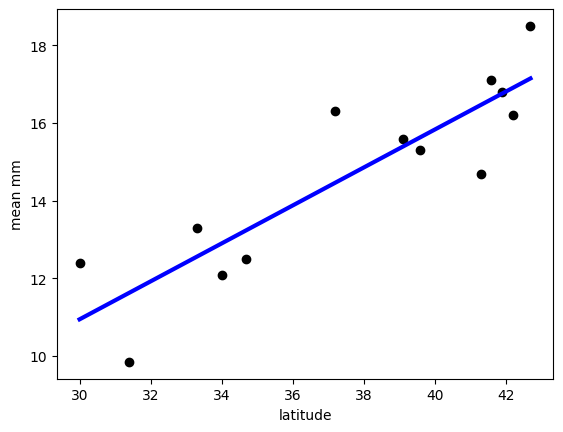

In [5]:
plt.scatter(X, y, color='black')
plt.plot(X, y_hat, color='blue', linewidth=3)
plt.xlabel('latitude')
plt.ylabel('mean mm')

Text(0, 0.5, 'mean mm')

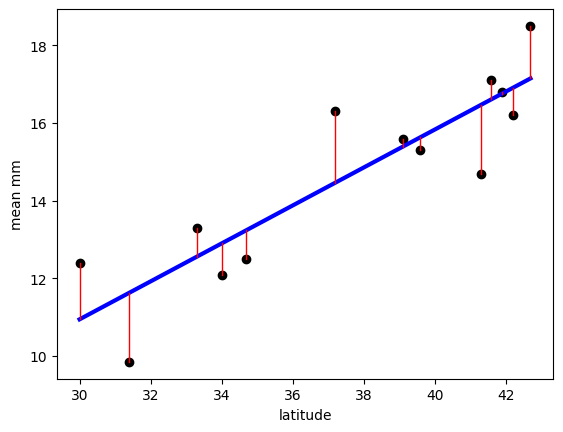

In [6]:
plt.scatter(X, y, color='black')
plt.plot(X, y_hat, color='blue', linewidth=3)

for i in range(len(X)):
  plt.plot([X.iloc[i], X.iloc[i]], [y.iloc[i], y_hat[i]], color='red', linewidth=1)
plt.xlabel('latitude')
plt.ylabel('mean mm')

In [7]:
print('Intercept: ', simple_lr.intercept_)
print('Coefficients: ', simple_lr.coef_)
print('R^2: ', simple_lr.score(X, y))
print('MSE: ', mean_squared_error(y, simple_lr.predict(X)))

Intercept:  [-3.70393483]
Coefficients:  [[0.48834592]]
R^2:  0.7774829925405429
MSE:  1.2486100789578567


# multiple linear regression

In [8]:
df_mpg = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/mpg.csv')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df_mpg.dropna(inplace=True)

In [10]:
y = df_mpg[['mpg']].values.reshape(-1, 1)
X = df_mpg.drop(['mpg', 'origin', 'name'], axis=1)
X.head()

# X = df_mpg[['cylinders', 'model_year'...etc]] <- another option

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [11]:
# drop null values in X
print(X.isnull().sum())

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64


In [13]:
multiple_lr = LinearRegression()
multiple_lr.fit(X, y)
y_hat = multiple_lr.predict(X)

mse = mean_squared_error(y, y_hat)
print('Intercept: ', multiple_lr.intercept_)
print('Coefficients: ', multiple_lr.coef_)
print('R^2: ', multiple_lr.score(X, y))
print('MSE: ', mse)

Intercept:  [-14.53525048]
Coefficients:  [[-3.29859089e-01  7.67843024e-03 -3.91355574e-04 -6.79461791e-03
   8.52732469e-02  7.53367180e-01]]
R^2:  0.8092552890383932
MSE:  11.590170981415225


# Polynomials

In [13]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = poly_features.fit_transform(X)
print(X_polynomial.shape)

(392, 27)


In [14]:
multiple_lr = LinearRegression()
multiple_lr.fit(X_polynomial, y)
y_hat = multiple_lr.predict(X_polynomial)

mse = mean_squared_error(y, y_hat)
print('Intercept: ', multiple_lr.intercept_)
print('Coefficients: ', multiple_lr.coef_)
print('R^2: ', multiple_lr.score(X_polynomial, y))
print('MSE: ', mse)

Intercept:  [314.31419006]
Coefficients:  [[ 7.83254724e+00 -4.63436107e-01  1.34076601e-01  2.05947622e-02
  -5.82530951e+00 -7.30654885e+00 -4.02998675e-01 -2.95478636e-03
   2.85094901e-02  5.23009744e-04  2.23132319e-01 -1.32425153e-01
   2.64370122e-05  1.56109768e-04  9.95174632e-06 -2.56246507e-03
   5.77564204e-03 -3.66455621e-04 -2.79665840e-05 -6.05515731e-03
  -1.78932803e-03  5.77583710e-07  7.03875653e-05 -4.11845095e-04
   2.25028567e-02  6.02654841e-02  5.33519018e-02]]
R^2:  0.8867594156038581
MSE:  6.880808010717752


# Logistic Regression

In [15]:
df_cancer = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/WisconsinBreastCancerDatabase.csv')
df_cancer.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df_cancer['Diagnosis'] = df_cancer['Diagnosis'].map({'M':1, 'B':0})
df_cancer.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X = df_cancer[['Radius mean']].values.reshape(-1,1)
y = df_cancer['Diagnosis'].values.reshape(-1,1)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
simple_logit = LogisticRegression()
simple_logit.fit(X,y)
y_hat = simple_logit.predict(X)
print(y_hat)

[1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Implementation with StatsModel

In [26]:
from statsmodels.api import OLS
import statsmodels.api as sm

In [30]:
mpg_data = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/mpg.csv')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [31]:
mpg_data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [32]:
mpg_data.dropna(inplace=True)

In [33]:
X = mpg_data.drop(['mpg', 'origin', 'name'], axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [34]:
X = sm.add_constant(X)
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.0,8,307.0,130.0,3504,12.0,70
1,1.0,8,350.0,165.0,3693,11.5,70
2,1.0,8,318.0,150.0,3436,11.0,70
3,1.0,8,304.0,150.0,3433,12.0,70
4,1.0,8,302.0,140.0,3449,10.5,70


In [35]:
y = mpg_data.mpg

In [36]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          3.79e-135
Time:                        21:14:50   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051   

## Logistic Regression with StatsModels

In [47]:
df_cancer = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/WisconsinBreastCancerDatabase.csv')
df_cancer.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
df_cancer['Diagnosis'] = df_cancer['Diagnosis'].map({'M':1, 'B':0})

In [50]:
X = df_cancer.drop(['ID', 'Diagnosis'], axis=1)
X = sm.add_constant(X[['Texture mean', 'Radius mean']])
y = df_cancer.Diagnosis
X.head()

,const,Texture mean,Radius mean
0,1.0,10.38,17.99
1,1.0,17.77,20.57
2,1.0,21.25,19.69
3,1.0,20.38,11.42
4,1.0,14.34,20.29


In [51]:
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.255820
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.6126
Time:                        21:28:30   Log-Likelihood:                -145.56
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.105e-100
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.8494      1.774    -11.189      0.000     -23.326     -16.373
Texture mean     0.2181

# Comments and insights

As I am more familiar with the sklearn package, I was more comfortable performing the necessary steps during the lab, though StatsModels seemed very intuitive with its API implementation, and I enjoy its ability to provide a summary of the model's performance without needing to call each attribute in print statements, along with potential issues with the model presented beneath.

For instance, when we had issues with Logistic Regression in StatsModels, an earlier flag we got in our OLS model, it indicated strong colinearity issues among some columns, which led to the LinAlgError: Singular Matrix problem we initially faced before using a smaller feature set. I recalled having similar issues in a past semester using the same dataset, where some of the features have correlation in the high 90 percents, which creates issues in calculating matrices.

It's hard to say which library I will use in the final project, but as of now, they both have features which would be useful.